# Exercises 7 Chapter 3

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
import pandas as pd
import numpy as np

# Smallest Interval

## Create Table

In [3]:
def Poiss_table(N,u):
    pmf = np.array([round(poisson.pmf(n,u),4) for n in range(N)])
    cdf = np.array([round(poisson.cdf(n,u),4) for n in range(N)])
    i = np.argsort(pmf)[::-1]
    r = np.array([np.where(i == x)[0][0]+1 for x in range(N)])
    F_r = pmf[np.argsort(r)].cumsum()[r-1]
    data = {'P(n|u)':pmf, 'F(n|u)':cdf, 'R':r, 'F_r(n|u)':F_r }
    df = pd.DataFrame(data)
    return df    

## Smallest Interval

In [4]:
def smallest(df,alpha):
    srtd = df['F_r(n|u)'].reindex(np.argsort(df['R']))
    upper = np.min(srtd[srtd>=alpha])
    array = np.argwhere(srtd == upper)
    sml = srtd[:array[0][0]+1]
    return sml.index.to_numpy()

## Band Plot

In [15]:
intervals = []
for uu in np.arange(0.2,14, 0.1):
    df = Poiss_table(N=24,u=uu)
    sml = smallest(df,0.68)
    intervals.append((np.min(sml),np.max(sml)))
intervals = np.array(intervals)

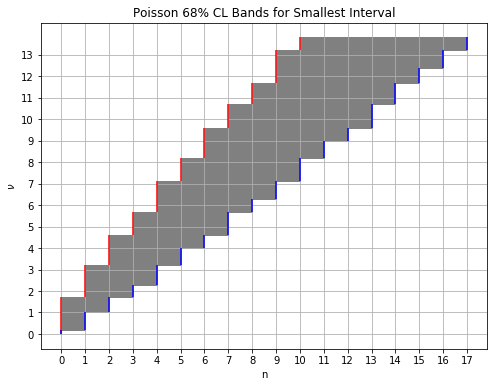

In [16]:
plt.figure(figsize=[8.0,6.0])
plt.xticks(ticks = np.arange(len(df)))
plt.yticks(ticks = np.arange(len(intervals)+1, step = 10), labels=np.arange(int(len(intervals)/10+1)))
plt.ylabel(r'$\nu$')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 68% CL Bands for Smallest Interval')

plt.vlines(x = intervals[:,0], ymin = np.arange(len(intervals)), ymax = np.arange(1,len(intervals)+1), colors='red')
plt.vlines(x = intervals[:,1], ymin = np.arange(len(intervals)), ymax = np.arange(1,len(intervals)+1), colors='blue')
#plt.fill_betweenx(y=np.arange(7), x1=intervals[:,0], x2 = intervals[:,1])
a=0
for e in intervals:
    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')
    a+=1

# Reproduction of Figure 3.2 of Script

In [19]:
intervals = []
for uu in np.arange(0.1,12, 0.1):
    df = Poiss_table(N=24,u=uu)
    sml = smallest(df,0.90)
    intervals.append((np.min(sml),np.max(sml)))
intervals = np.array(intervals)

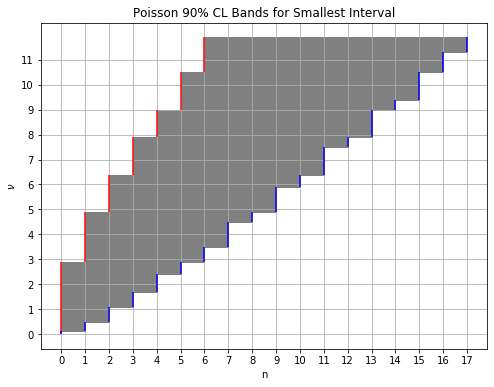

In [21]:
plt.figure(figsize=[8.0,6.0])
plt.xticks(ticks = np.arange(len(df)))
plt.yticks(ticks = np.arange(len(intervals)+1, step = 10), labels=np.arange(int(len(intervals)/10+1)))
plt.ylabel(r'$\nu$')
plt.xlabel('n')
plt.grid()
plt.title(r'Poisson 90% CL Bands for Smallest Interval')

plt.vlines(x = intervals[:,0], ymin = np.arange(len(intervals)), ymax = np.arange(1,len(intervals)+1), colors='red')
plt.vlines(x = intervals[:,1], ymin = np.arange(len(intervals)), ymax = np.arange(1,len(intervals)+1), colors='blue')
#plt.fill_betweenx(y=np.arange(7), x1=intervals[:,0], x2 = intervals[:,1])
a=0
for e in intervals:
    plt.fill_betweenx(y=np.array([a,a+1]), x1 = np.array([e[0],e[0]]), x2 = np.array(e[1],e[1]), color = 'gray')
    a+=1